In [47]:
import numpy as np
import pandas as pd
import cv2, os, re
import matplotlib.pyplot as plt
import imutils

from tqdm import tqdm
from imutils.object_detection import non_max_suppression

from tensorflow.keras.models import load_model

In [2]:
model = load_model('ship-model.h5')

2024-03-12 14:54:39.492207: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/cv2/../../lib64:
2024-03-12 14:54:39.492264: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-12 14:54:39.492293: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UTILISA-O4KTAUM): /proc/driver/nvidia/version does not exist
2024-03-12 14:54:39.492720: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
scene_path = '../../data_copy/data_test'

def load_scenes():

    scenes = []
    dirfiles = os.listdir(scene_path)
    dirfiles = sorted(dirfiles)
    for file in dirfiles:

        print(os.path.join(scene_path, file))
        scene = cv2.imread(os.path.join(scene_path, file))
        scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
        scenes.append(scene)
        pass

    return scenes
    pass

In [4]:
scenes = load_scenes()

../../data_copy/data_test/berlin.PNG
../../data_copy/data_test/madrid.PNG
../../data_copy/data_test/ny.PNG
../../data_copy/data_test/paris.PNG
../../data_copy/data_test/scene_1.png
../../data_copy/data_test/scene_2.png
../../data_copy/data_test/scene_3.png
../../data_copy/data_test/scene_4.png


In [5]:
bob = list(enumerate(scenes))[7]
print(type(bob))
i, scene = bob

<class 'tuple'>


In [7]:
scene.shape

(781, 835, 3)

In [8]:
datasets = ['../../data_copy/data_train']

class_names = ["no-plane","plane"]

class_name_labels = {class_name:i for i,class_name in enumerate(class_names)}

num_classes = len(class_names)
class_name_labels

def load_data():
    images, labels = [], []

    for dataset in datasets:

        for folder in os.listdir(dataset):

            label = class_name_labels[folder]

            for file in tqdm(os.listdir(os.path.join(dataset,folder))):

                img_path = os.path.join(dataset,folder,file)

                img = cv2.imread(img_path)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                #img = cv2.resize(img, (48,48))

                images.append(img)
                labels.append(label)
                pass
            pass

        images = np.array(images,dtype=np.float32)/255.0
        labels = np.array(labels,dtype=np.float32)
        pass

    return (images, labels)
    pass

(images, labels) = load_data()
images.shape, labels.shape

100%|██████████| 24000/24000 [00:09<00:00, 2506.74it/s]


((32000, 20, 20, 3), (32000,))

In [9]:
type(images)

numpy.ndarray

In [13]:
image_test = images[0]

In [33]:
bob = labels[0]
bob

1.0

In [34]:
image_testneg = images[31999]

In [35]:
bob = labels[31999]
bob

0.0

In [21]:
image_test.shape

(20, 20, 3)

In [53]:
image_test

array([[[0.8627451 , 0.8117647 , 0.7529412 ],
        [0.8509804 , 0.8       , 0.7411765 ],
        [0.8666667 , 0.81960785, 0.75686276],
        ...,
        [0.8980392 , 0.8352941 , 0.76862746],
        [0.81960785, 0.7647059 , 0.69803923],
        [0.7411765 , 0.7019608 , 0.6313726 ]],

       [[0.8745098 , 0.8235294 , 0.7607843 ],
        [0.8509804 , 0.8039216 , 0.7372549 ],
        [0.8627451 , 0.81960785, 0.7607843 ],
        ...,
        [0.93333334, 0.87058824, 0.8039216 ],
        [0.8509804 , 0.7921569 , 0.7294118 ],
        [0.7882353 , 0.7411765 , 0.6745098 ]],

       [[0.87058824, 0.8156863 , 0.7529412 ],
        [0.8627451 , 0.8117647 , 0.7490196 ],
        [0.85490197, 0.8156863 , 0.75686276],
        ...,
        [0.91764706, 0.85882354, 0.7882353 ],
        [0.87058824, 0.80784315, 0.7372549 ],
        [0.83137256, 0.7764706 , 0.7137255 ]],

       ...,

       [[0.8745098 , 0.8156863 , 0.7529412 ],
        [0.88235295, 0.83137256, 0.7647059 ],
        [0.90588236, 0

In [51]:
type(image_test[0][0][0])

numpy.float32

In [52]:
image_test[0][0][0]

0.8627451

In [25]:
image_test_2 = np.array([image_test])

In [26]:
image_test_2.shape

(1, 20, 20, 3)

In [36]:
image_testneg_2 = np.array([image_testneg])

In [17]:
labels

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [27]:
pred = model.predict(np.array(image_test_2,dtype=np.float32))

In [37]:
predneg = model.predict(np.array(image_testneg_2,dtype=np.float32))

In [29]:
pred.shape

(1, 2)

In [31]:
pred

array([[4.908544e-06, 9.999951e-01]], dtype=float32)

In [39]:
predneg

array([[9.999951e-01, 4.892784e-06]], dtype=float32)

In [45]:
image_test.shape

(20, 20, 3)

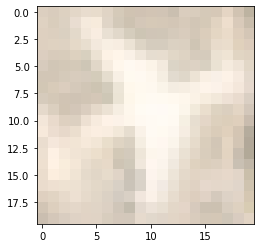

In [46]:
plt.imshow(image_test)

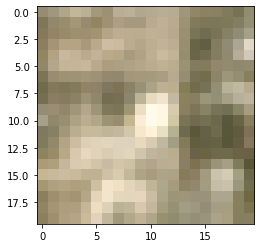

In [48]:
plt.imshow(image_testneg)

In [54]:
x = np.array([1, 2, 3, 4, 5])
def f(y):
    return y*2
# Obtain array of square of each element in x

z = np.array(list(map(f,x)))
z

array([ 2,  4,  6,  8, 10])